# Plot the Evolution of Error Characteristics for a Given Balancing Authority

In [1]:
# Start by importing the packages we need:
import os
import datetime

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from glob import glob
from matplotlib import pyplot 
from mpl_toolkits.axes_grid1 import make_axes_locatable


## Set the Directory Structure

In [2]:
# Identify the data input and image output directories:
statistics_input_directory = '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2025_ldrd/data/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2025_ldrd/figures/'


## Create a Function to Create the Quick Look Plot for a Given Balancing Authority


In [74]:
def plot_ba_error_evolution(ba_to_plot: str, statistics_input_directory: str, image_output_dir: str, image_resolution: int, save_images=False):
    
    # Read in the compiled statistics dataset created by the "calculate_error_statistics.ipynb" notebook:
    stats_df = pd.read_csv((statistics_input_directory + 'Error_Statistics_Data.csv'))

    # Subset the data to the BA you want to plot:
    ba_df = stats_df.loc[(stats_df['BA'] == ba_to_plot)]

    # Subset the data to individual models:
    m1_df = ba_df.loc[(ba_df['Model'] == 'M1')]
    m2_df = ba_df.loc[(ba_df['Model'] == 'M2')]
    m3_df = ba_df.loc[(ba_df['Model'] == 'M3')]
    m4_df = ba_df.loc[(ba_df['Model'] == 'M4')]
    m5_df = ba_df.loc[(ba_df['Model'] == 'M5')]
    m6_df = ba_df.loc[(ba_df['Model'] == 'M6')]

    # Make the plot:
    plt.figure(figsize=(35, 20))
    plt.rcParams['font.size'] = 18
    plt.subplot(221)
    plt.grid(True)
    plt.plot(m1_df['Year'], m1_df['RMS_ABS'], color='black', linestyle='-', label='M1 (T16-17)', linewidth=2)
    plt.plot(m2_df['Year'], m2_df['RMS_ABS'], color='firebrick', linestyle='-', label='M2 (T17-18)', linewidth=2)
    plt.plot(m3_df['Year'], m3_df['RMS_ABS'], color='darkorange', linestyle='-', label='M3 (T18-19)', linewidth=2)
    plt.plot(m4_df['Year'], m4_df['RMS_ABS'], color='olivedrab', linestyle='-', label='M4 (T19-20)', linewidth=2)
    plt.plot(m5_df['Year'], m5_df['RMS_ABS'], color='deepskyblue', linestyle='-', label='M5 (T20-21)', linewidth=2)
    plt.plot(m6_df['Year'], m6_df['RMS_ABS'], color='blueviolet', linestyle='-', label='M6 (T21-22)', linewidth=2)
    plt.scatter(m1_df['Year'], m1_df['RMS_ABS'], s=50, c='black')
    plt.scatter(m2_df['Year'], m2_df['RMS_ABS'], s=50, c='firebrick')
    plt.scatter(m3_df['Year'], m3_df['RMS_ABS'], s=50, c='darkorange')
    plt.scatter(m4_df['Year'], m4_df['RMS_ABS'], s=50, c='olivedrab')
    plt.scatter(m5_df['Year'], m5_df['RMS_ABS'], s=50, c='deepskyblue')
    plt.scatter(m6_df['Year'], m6_df['RMS_ABS'], s=50, c='blueviolet')
    plt.legend(loc='upper left', prop={'size': 15})
    plt.xlim([2017.75, 2024.25])
    plt.ylabel('Root-Mean-Squared Absolute Error [MWh]', fontsize=18)
    plt.title(('RMS Absolute Error in ' + ba_to_plot), fontsize=21)
    plt.title('a)', loc='left', fontsize=18)

    plt.subplot(222)
    plt.grid(True)
    plt.plot(m1_df['Year'], m1_df['RMS_NORM'], color='black', linestyle='-', label='M1 (T16-17)', linewidth=2)
    plt.plot(m2_df['Year'], m2_df['RMS_NORM'], color='firebrick', linestyle='-', label='M2 (T17-18)', linewidth=2)
    plt.plot(m3_df['Year'], m3_df['RMS_NORM'], color='darkorange', linestyle='-', label='M3 (T18-19)', linewidth=2)
    plt.plot(m4_df['Year'], m4_df['RMS_NORM'], color='olivedrab', linestyle='-', label='M4 (T19-20)', linewidth=2)
    plt.plot(m5_df['Year'], m5_df['RMS_NORM'], color='deepskyblue', linestyle='-', label='M5 (T20-21)', linewidth=2)
    plt.plot(m6_df['Year'], m6_df['RMS_NORM'], color='blueviolet', linestyle='-', label='M6 (T21-22)', linewidth=2)
    plt.scatter(m1_df['Year'], m1_df['RMS_NORM'], s=50, c='black')
    plt.scatter(m2_df['Year'], m2_df['RMS_NORM'], s=50, c='firebrick')
    plt.scatter(m3_df['Year'], m3_df['RMS_NORM'], s=50, c='darkorange')
    plt.scatter(m4_df['Year'], m4_df['RMS_NORM'], s=50, c='olivedrab')
    plt.scatter(m5_df['Year'], m5_df['RMS_NORM'], s=50, c='deepskyblue')
    plt.scatter(m6_df['Year'], m6_df['RMS_NORM'], s=50, c='blueviolet')
    plt.legend(loc='upper left', prop={'size': 15})
    plt.xlim([2017.75, 2024.25])
    plt.ylabel('Root-Mean-Squared Normalized Error', fontsize=18)
    plt.title(('RMS Normalized Error in ' + ba_to_plot), fontsize=21)
    plt.title('b)', loc='left', fontsize=18)

    plt.subplot(223)
    plt.grid(True)
    plt.plot(m1_df['Year'], m1_df['MAPE'], color='black', linestyle='-', label='M1 (T16-17)', linewidth=2)
    plt.plot(m2_df['Year'], m2_df['MAPE'], color='firebrick', linestyle='-', label='M2 (T17-18)', linewidth=2)
    plt.plot(m3_df['Year'], m3_df['MAPE'], color='darkorange', linestyle='-', label='M3 (T18-19)', linewidth=2)
    plt.plot(m4_df['Year'], m4_df['MAPE'], color='olivedrab', linestyle='-', label='M4 (T19-20)', linewidth=2)
    plt.plot(m5_df['Year'], m5_df['MAPE'], color='deepskyblue', linestyle='-', label='M5 (T20-21)', linewidth=2)
    plt.plot(m6_df['Year'], m6_df['MAPE'], color='blueviolet', linestyle='-', label='M6 (T21-22)', linewidth=2)
    plt.scatter(m1_df['Year'], m1_df['MAPE'], s=50, c='black')
    plt.scatter(m2_df['Year'], m2_df['MAPE'], s=50, c='firebrick')
    plt.scatter(m3_df['Year'], m3_df['MAPE'], s=50, c='darkorange')
    plt.scatter(m4_df['Year'], m4_df['MAPE'], s=50, c='olivedrab')
    plt.scatter(m5_df['Year'], m5_df['MAPE'], s=50, c='deepskyblue')
    plt.scatter(m6_df['Year'], m6_df['MAPE'], s=50, c='blueviolet')
    plt.legend(loc='upper left', prop={'size': 15})
    plt.xlim([2017.75, 2024.25])
    plt.ylabel('Mean Absolute Percentage Error', fontsize=18)
    plt.title(('MAPE in ' + ba_to_plot), fontsize=21)
    plt.title('c)', loc='left', fontsize=18)

    plt.subplot(224)
    plt.grid(True)
    plt.plot(m1_df['Year'], m1_df['R2'], color='black', linestyle='-', label='M1 (T16-17)', linewidth=2)
    plt.plot(m2_df['Year'], m2_df['R2'], color='firebrick', linestyle='-', label='M2 (T17-18)', linewidth=2)
    plt.plot(m3_df['Year'], m3_df['R2'], color='darkorange', linestyle='-', label='M3 (T18-19)', linewidth=2)
    plt.plot(m4_df['Year'], m4_df['R2'], color='olivedrab', linestyle='-', label='M4 (T19-20)', linewidth=2)
    plt.plot(m5_df['Year'], m5_df['R2'], color='deepskyblue', linestyle='-', label='M5 (T20-21)', linewidth=2)
    plt.plot(m6_df['Year'], m6_df['R2'], color='blueviolet', linestyle='-', label='M6 (T21-22)', linewidth=2)
    plt.scatter(m1_df['Year'], m1_df['R2'], s=50, c='black')
    plt.scatter(m2_df['Year'], m2_df['R2'], s=50, c='firebrick')
    plt.scatter(m3_df['Year'], m3_df['R2'], s=50, c='darkorange')
    plt.scatter(m4_df['Year'], m4_df['R2'], s=50, c='olivedrab')
    plt.scatter(m5_df['Year'], m5_df['R2'], s=50, c='deepskyblue')
    plt.scatter(m6_df['Year'], m6_df['R2'], s=50, c='blueviolet')
    plt.legend(loc='lower left', prop={'size': 15})
    plt.xlim([2017.75, 2024.25])
    plt.ylim([(ba_df['R2'].min()-0.05), 1])
    plt.ylabel('Coefficient of Determination', fontsize=18)
    plt.title(('R2 in ' + ba_to_plot), fontsize=21)
    plt.title('d)', loc='left', fontsize=18)
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_dir + 'BA_Error_Evolution_' + ba_to_plot + '.png'), dpi=image_resolution, bbox_inches='tight')
    

## Make the Plot


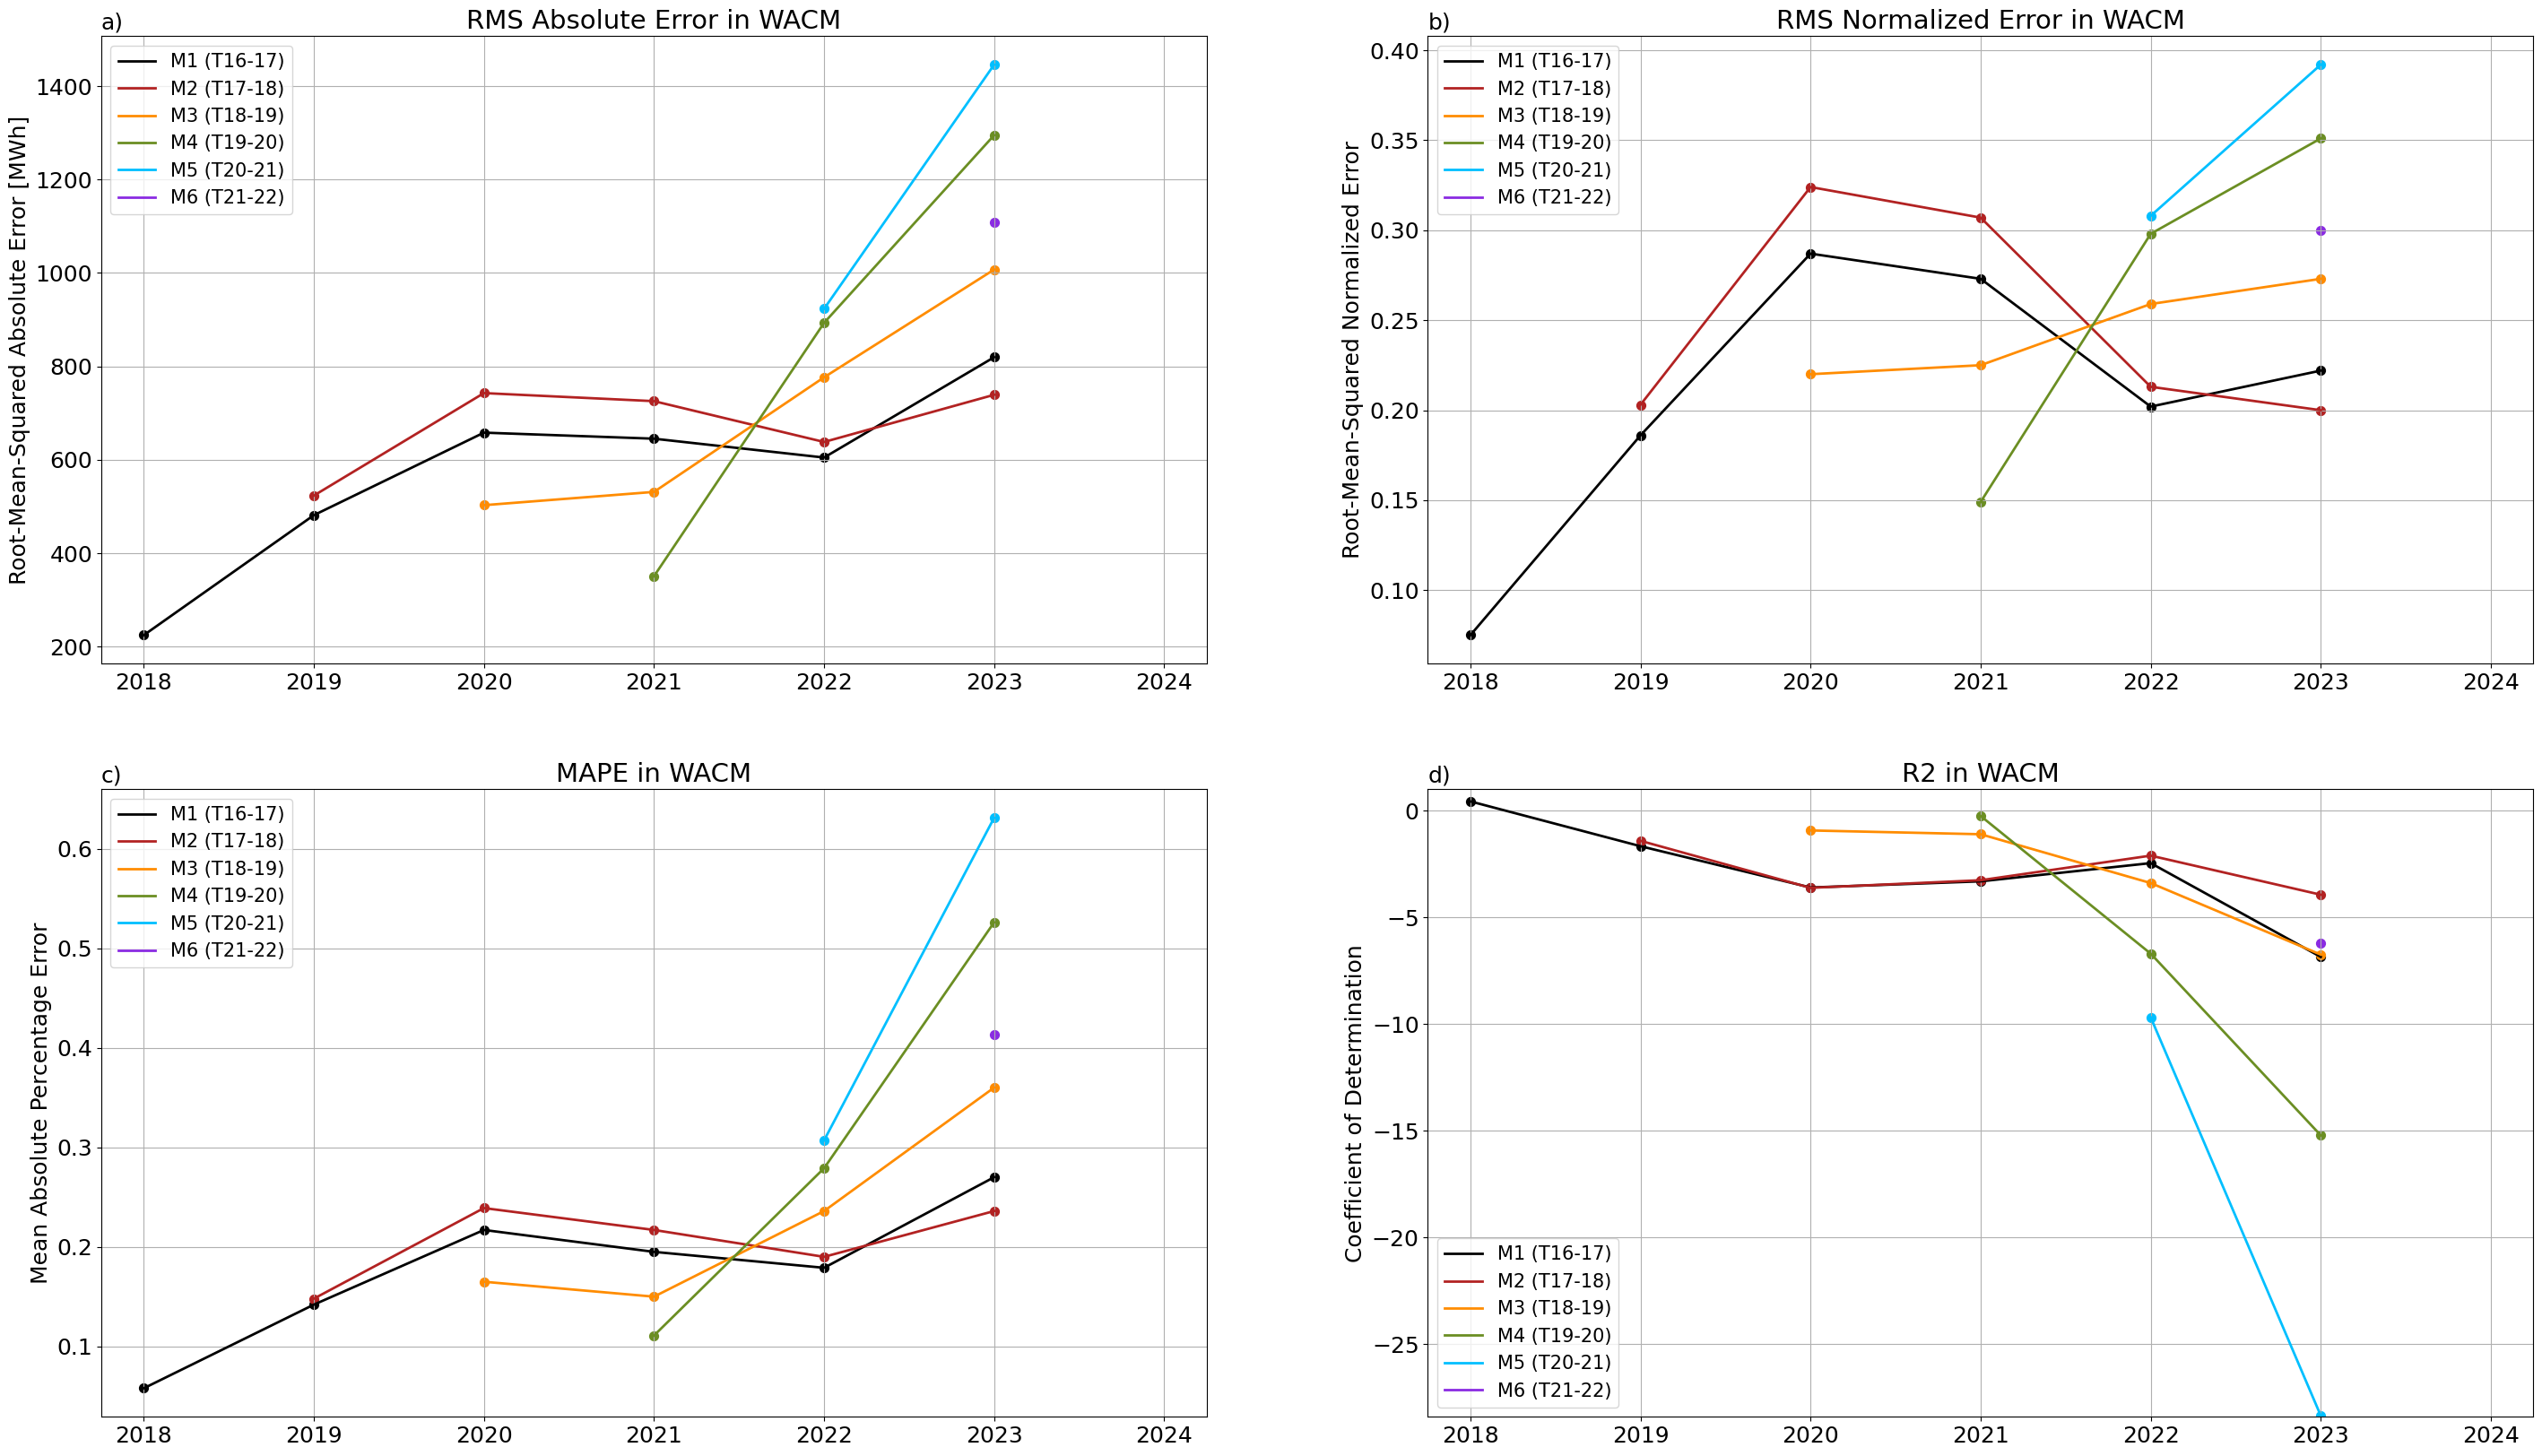

In [75]:
plot_ba_error_evolution(ba_to_plot = 'WACM',
                        statistics_input_directory = statistics_input_directory,
                        image_output_dir = image_output_dir, 
                        image_resolution = 300, 
                        save_images = True)
